In [2]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
#define truncate function
def truncate(color_value):
    if color_value < 0:
        color_value = 0
    elif color_value > 255: 
        color_value = 255
    return color_value

In [4]:
#1. Thay đổi độ sáng cho ảnh
def change_brightness(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape

    alpha = 100

    for y in range (height):
        for x in range(width):
            coordinate = x, y
            red, green, blue = image.getpixel(coordinate)
            new_red = truncate(red + alpha)
            new_green = truncate(green + alpha)
            new_blue = truncate(blue + alpha)
            new_image.putpixel((x, y), (new_red, new_green, new_blue))
    
    return new_image


In [5]:
#2. Thay đổi độ tương phản
def change_contrast(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape
    
    scala = 1.5

    for y in range (height):
        for x in range(width):
            coordinate = x, y
            red, green, blue = image.getpixel(coordinate)
            new_red = truncate(int(red * scala))
            new_green = truncate(int(green * scala))
            new_blue = truncate(int(blue * scala))
            new_image.putpixel((x, y), (new_red, new_green, new_blue))
            
    return new_image

In [6]:
#3. Lật ảnh (ngang/dọc)
#define reverse function to reverse the vector of matrix
def reverse_pixels(current_coordinate, reverse_coordinate, image):
    x1, y1 = current_coordinate
    x2, y2 = reverse_coordinate
    current_color = image.getpixel(current_coordinate)
    reverse_coordinate_color = image.getpixel(reverse_coordinate)
    image.putpixel((x1, y1), reverse_coordinate_color)
    image.putpixel((x2, y2), current_color)

def flip_photo_horizontal(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    for y in range(height):
        idx = 1 
        for x in range(width):
            current_coordinate = x, y
            reverse_coordinate = width - x - 1, y
            reverse_pixels(current_coordinate, reverse_coordinate, new_image)
                
            if (idx == int(width / 2) and width % 2 == 0) or (idx == int(width / 2) + 1 and width % 2 != 0):
                break
            idx += 1

    return new_image

def flip_photo_vertical(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    for x in range(width):
        idx = 1 
        for y in range(height):
            current_coordinate = x, y
            reverse_coordinate = x, height - y - 1
            reverse_pixels(current_coordinate, reverse_coordinate, new_image)

            if (idx == int(height / 2) and height % 2 == 0) or (idx == int(height / 2) + 1 and height % 2 != 0):
                break
            idx += 1

    return new_image


In [7]:
#4. Chuyển đổi ảnh RGB thành ảnh xám/sepia
def convert_RGB_to_greyscale(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    for y in range(height):
        for x in range(width):
            coordinate = x, y
            red, green, blue = image.getpixel(coordinate)
            # average = int((red + green + blue) / 3)
            grey_scale = int(0.299 * red + 0.587 * green + 0.114 * blue)
            new_image.putpixel((x, y), (grey_scale, grey_scale, grey_scale))

    return new_image

def convert_RGB_to_sepia(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    for y in range(height):
        for x in range(width):
            coordinate = x, y
            red, green, blue = image.getpixel(coordinate)
            
            new_red = truncate(int(red * 0.393 + green * 0.769 + blue * 0.189))
            new_green = truncate(int(red * 0.349 + green * 0.686 + blue * 0.168))
            new_blue = truncate(int(red * 0.272 + green * 0.534 + blue * 0.131))
            
            new_image.putpixel((x, y), (new_red, new_green, new_blue))
    
    return new_image


In [8]:
#5. Làm mờ / Sắc nét
def blur_image(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    #blur with radius = 2
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            coordinates = [(x-1, y-1), (x, y-1), (x+1, y-1),
                           (x-1, y), (x, y), (x+1, y),
                           (x-1, y+1), (x, y+1), (x+1, y+1)]
            
            sum = (0, 0, 0)
            for coor in coordinates:
                tmp1, tmp2, tmp3 = sum
                red, green, blue = image.getpixel(coor)
                sum = (tmp1 + red, tmp2 + green, tmp3 + blue)
            r, g, b = sum
            new_image.putpixel((x, y), (int(r/9), int(g/9), int(b/9)))
    
    return new_image

def sharpen_image(image):
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            coordinates = [(x-1, y-1), (x, y-1), (x+1, y-1),
                           (x-1, y), (x, y), (x+1, y),
                           (x-1, y+1), (x, y+1), (x+1, y+1)]
            
            sum = (0, 0, 0)
            idx = 0
            for coor in coordinates:
                tmp1, tmp2, tmp3 = sum
                red, green, blue = image.getpixel(coor)
                if idx % 2 != 0:
                    alpha = -1
                elif idx == 4:
                    alpha = 5
                else:
                    alpha = 0
                sum = (tmp1 + red * alpha, tmp2 + green * alpha, tmp3 + blue * alpha)
                idx += 1
            new_image.putpixel((x, y), sum)
                    
    return new_image


In [9]:
#6. Cắt hình ở trung tâm
def crop_image_in_center(image):
    #tinh trung tam bang cach chia doi chieu dai va chieu rong
    image_matrix = np.array(image)
    height, width, channels = image_matrix.shape

    dist_x = int(width/4)
    dist_y = int(height/4)

    new_height = 2 * dist_y
    new_width = 2 * dist_x
    new_image = Image.new(mode = "RGB", size = (new_width, new_height))
    for y in range(new_height):
        for x in range(new_width):
            coor = (x + dist_x, y + dist_y)
            pixel = image.getpixel(coor)
            new_image.putpixel((x, y), pixel)
            if (x == width - dist_x and y == height - dist_y):
                break
            
    return new_image

In [10]:
#7. Cắt ảnh theo khung tròn
def crop_image_in_circle(image):
    #tạo ra phương trình đường tròn
    #xác định điểm nào thuộc phương trình đường tròn, điểm nào không thuộc
    #sử dụng phép impressing để lấy pixels thuộc đường tròn
    #những pixels không thuộc đường tròn gán thành màu đen
    image_matrix = np.array(image)
    new_image = image.copy()
    height, width, channels = image_matrix.shape 

    radius = height / 2
    center_I = (int(width/2), int(height/2))

    for y in range(height):
        for x in range(width):
            if (x - center_I[0])**2 + (y - center_I[1])**2 > radius**2:
                new_image.putpixel((x, y), (0, 0, 0))

    return new_image


In [11]:
#Nhập ảnh
def input_image():
    image = input("Nhập hình ảnh muốn xử lí (ex1.jpg, ex2.png,... )")
    name = image
    image = Image.open(image).convert('RGB')

    return image, name

#Xuất ảnh
def output(image_result, function, name):
    res = matrix = np.array(image_result)
    recovered = res.reshape(matrix.shape) 
    plt.imshow(recovered)
    recovered = recovered.astype(np.uint8)
    name = name.split('.')
    file_name = name[0] + "_" + function + ".png"
    plt.imsave(file_name, recovered)
    plt.show()

#Chọn chức năng
def menu(image, name):
    print("Select image processing function\n")
    print("1. Change brightness \n")
    print("2. Change contrast \n")
    print("3. Flip photo \n")
    print("4. Convert RGB to Greyscale/Sepia \n")
    print("5. Blur/Sharpen image \n")
    print("6. Crop image in center \n")
    print("7. Crop image in circle frame \n")
    func = int(input("Enter 0 - 7 to select function"))

    if func == 1:
        image_result = change_brightness(image)
        output(image_result, "brightness", name)
    elif func == 2:
        image_result = change_contrast(image)
        output(image_result, "contrast", name)
    elif func == 3:
        image_result1 = flip_photo_horizontal(image)
        output(image_result1, "flip_horizontal",  name)
        image_result2 = flip_photo_vertical(image)
        output(image_result2, "flip_vertical", name)
    elif func == 4:
        image_result1 = convert_RGB_to_greyscale(image)
        output(image_result1, "grey", name)
        image_result2 = convert_RGB_to_sepia(image)
        output(image_result2, "sepia", name)
    elif func == 5:
        #get blur image then sharpen it
        image_result1 = blur_image(image)
        output(image_result1, "blur", name)
        #get the name of blur image which has already create
        name = name.split('.')
        file_name = name[0] + "_blur.png"
        blur_file = Image.open(file_name).convert('RGB')
        #export sharpen image
        image_result2 = sharpen_image(blur_file)
        output(image_result2, "sharpen", name[0])
    elif func == 6:
        image_result = crop_image_in_center(image)
        output(image_result, "center", name)
    elif func == 7:
        image_result = crop_image_in_circle(image)
        output(image_result, "circle", name)
    elif func == 0:
        #1.
        image_result1 = change_brightness(image)
        output(image_result1, "brightness", name)
        #2.
        image_result2 = change_contrast(image)
        output(image_result2, "contrast", name)
        #3.
        image_result3 = flip_photo_horizontal(image)
        output(image_result3, "flip_horizontal",  name)
        image_result4 = flip_photo_vertical(image)
        output(image_result4, "flip_vertical", name)
        #4.
        image_result5 = convert_RGB_to_greyscale(image)
        output(image_result5, "grey", name)
        image_result6 = convert_RGB_to_sepia(image)
        output(image_result6, "sepia", name)
        #5. 
        #get blur image then sharpen it
        image_result7 = blur_image(image)
        output(image_result7, "blur", name)
        #get the name of blur image which has already create
        temp_name = name
        temp_name = temp_name.split('.')
        file_name = temp_name[0] + "_blur.png"
        blur_file = Image.open(file_name).convert('RGB')
        #export sharpen image
        image_result8 = sharpen_image(blur_file)
        output(image_result8, "sharpen", temp_name[0])
        #6.
        image_result9 = crop_image_in_center(image)
        output(image_result9, "center", name)
        #7.
        image_result10 = crop_image_in_circle(image)
        output(image_result10, "circle", name)

Select image processing function

1. Change brightness 

2. Change contrast 

3. Flip photo 

4. Convert RGB to Greyscale/Sepia 

5. Blur/Sharpen image 

6. Crop image in center 

7. Crop image in circle frame 



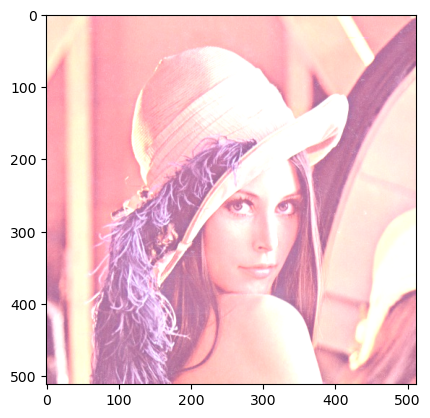

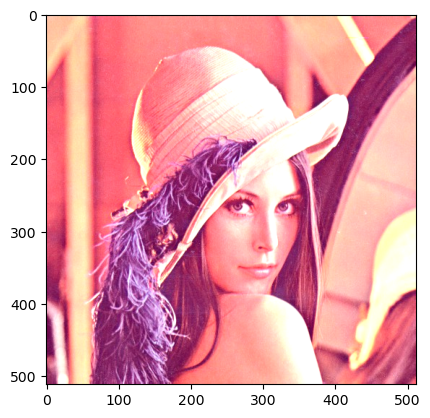

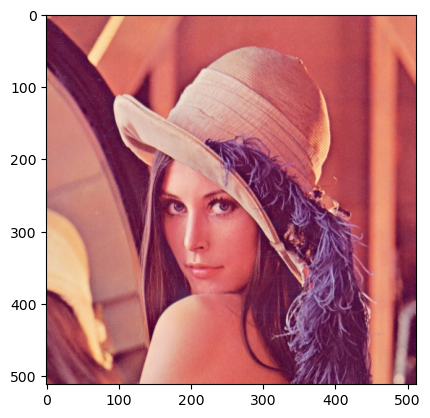

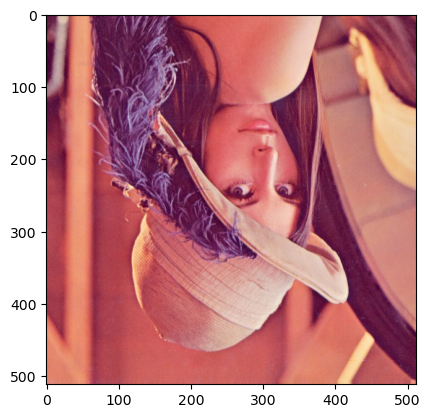

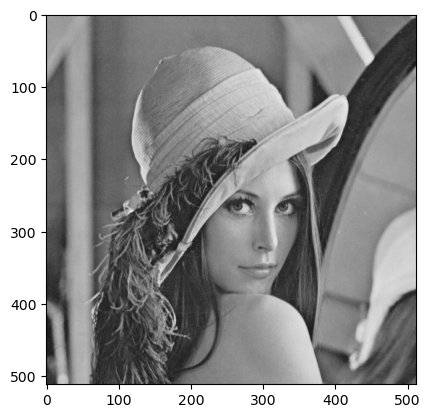

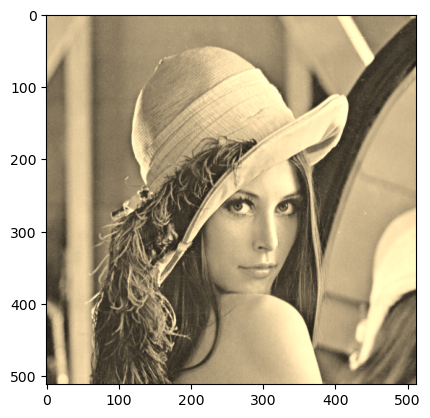

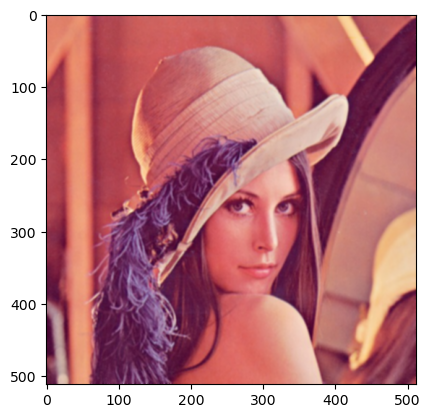

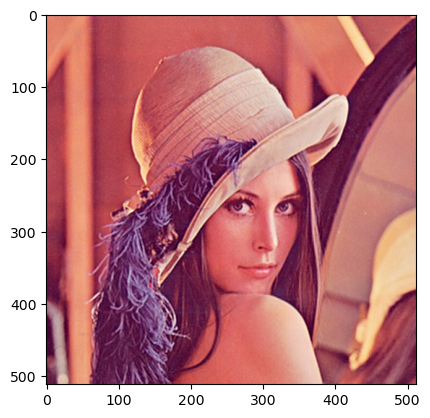

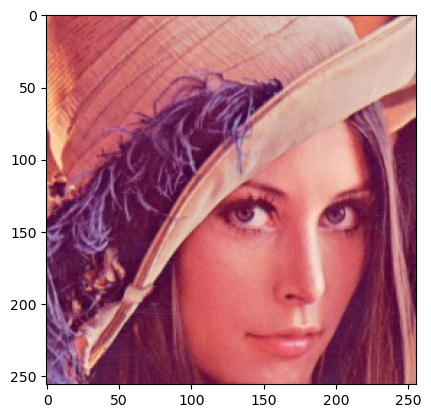

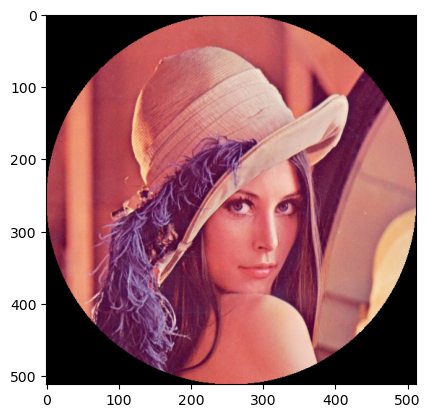

In [12]:
if __name__ == "__main__":
    image, name = input_image()
    menu(image, name)